<img src="https://www.insidehighered.com/sites/default/server_files/media/california_0.jpg" width=400>  


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory

Acknowledgements:
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

In [1]:
import pandas as pd
CA_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"

ca = pd.read_csv(CA_url)
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Q1: show the number of missing data in each column of the dataframe

In [2]:
# Your code here . . .
ca.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


### Q2: show the data type for each column of the dataframe

In [3]:
# Your code here . . .
ca.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


### Q3: Plot a regression line and confidence interval
Create a lmplot that shows the linear regression between `median_income` and `median_house_value`. Only use data with `median_housing_value` < 500000. Include a meaningful title for the plot.

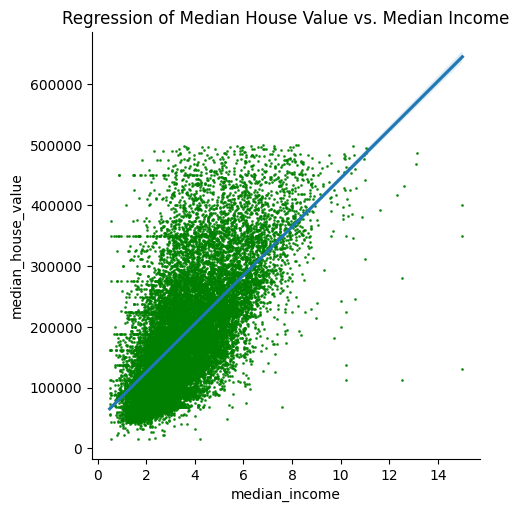

In [4]:
# Your code here . . .
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='median_income', y='median_house_value', data=ca[ca.median_house_value < 500000], scatter_kws={'s':1, 'color': 'green'})
plt.title('Regression of Median House Value vs. Median Income');


### Q4: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

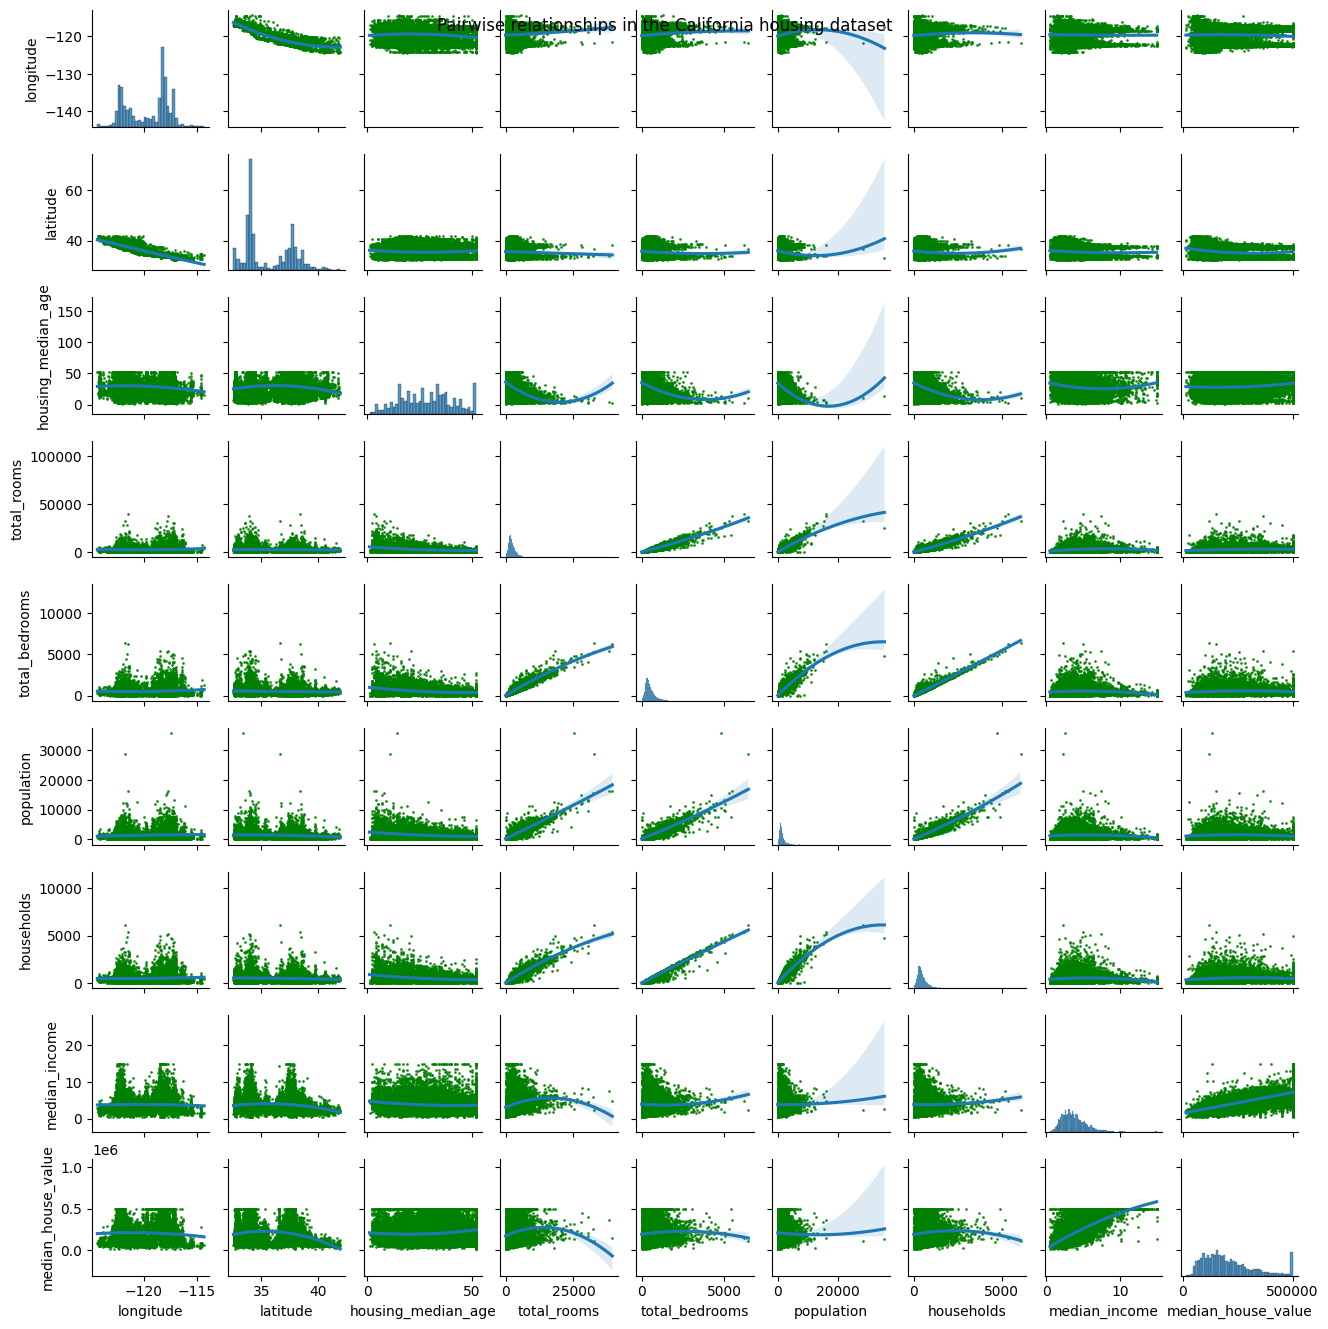

In [5]:
# Your code here . . .
g = sns.pairplot(data=ca, kind="reg", plot_kws={"scatter_kws":{"color":"green", "s":1}, "order":2},height=1.5);
g.fig.suptitle("Pairwise relationships in the California housing dataset");

### Q5. Create a relplot that shows the `median_income` and `median_house` along with the `longitude` and `latitude`.
Plot `longitude` along the x-axis and `latitude` along the y-axis. Use `hue` to display the `median_house_value` and the size of the data point `median_income`. Include a meaningful title to the plot.

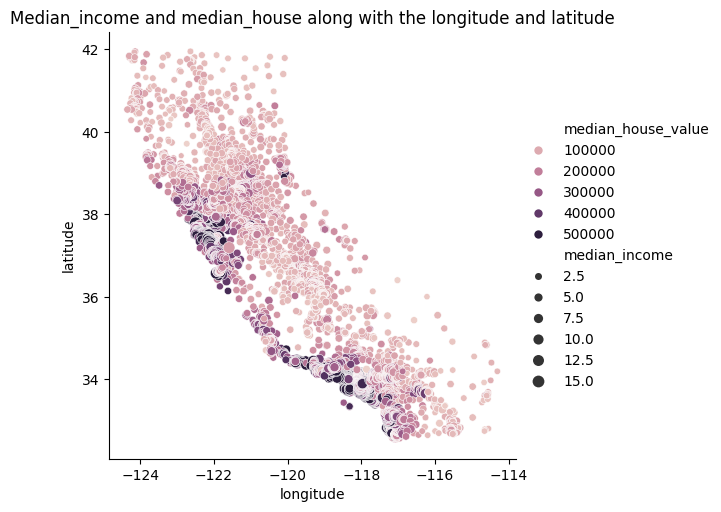

In [6]:
# Your code here . . .
sns.relplot(
    data=ca,
    x="longitude",
    y="latitude",
    hue="median_house_value",
    size="median_income"
)
plt.title("Median_income and median_house along with the longitude and latitude");

### Q6: Create a plot with small multiples plots
The small multiple plots should show the relationship between `median_house_value` vs `median_income` using `ocean_proximity` as the single category. Only use data with `median_house_value` < 500000. Organize the multiple plots to have 2 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

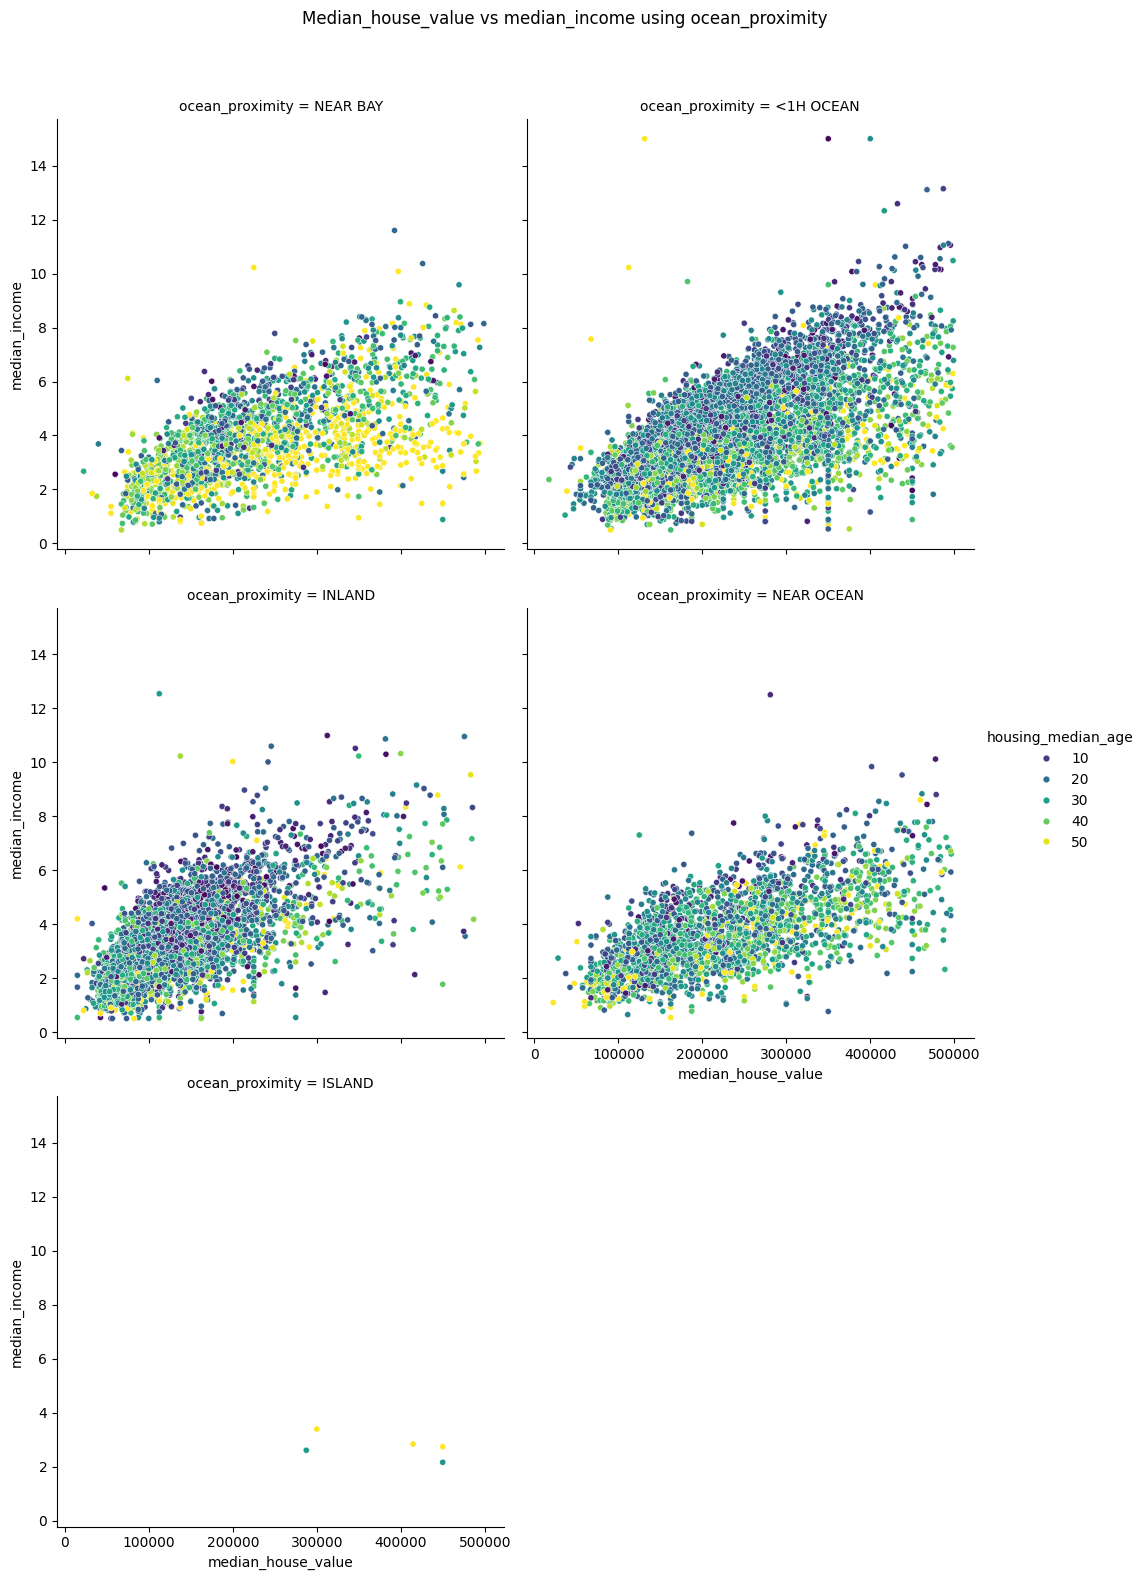

In [7]:
# Your code here . . .
g=sns.relplot(
    data=ca[ca.median_house_value < 500000],
    x="median_house_value",
    y="median_income",
    hue="housing_median_age",
    col="ocean_proximity",
    col_wrap=2,
    height=5,
    s=20,
    palette="viridis"
)

g.fig.suptitle("Median_house_value vs median_income using ocean_proximity", y=1.05);